# Ví dụ về Multilayer Perceptron với tập MNIST
Xây dựng mạng fully connected với 2 lớp ẩn sử dụng Keras

## Tổng quan về Neural Network

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## Tập dữ liệu MNIST

Ví dụ này sử dụng tập ảnh chữ số viết tay MNIST. MNIST gồm 60,000 ảnh cho huấn luyện và 10,000 ảnh cho kiểm thử mô hình. Mọi ảnh chữ số viết tay trong tập dữ liệu được chuẩn hóa về kích thước, cụ thể là (28x28) với giá trị pixels nằm trong khoảng 0 đến 1. Để đơn giản bài troán, mỗi ảnh được trải phẳng thành mảng numpy một chiều (784 thành phần)

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

Tham khảo: http://yann.lecun.com/exdb/mnist/

### Tải về dữ liệu MNIST

In [5]:
import tensorflow as tf

# Import MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

### Normalize và onehot

In [6]:
x_train = x_train/255
x_test = x_test/255

# one hot
import keras
num_classes = 10 # Tổng số lớp của MNIST (các số từ 0-9)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


Using TensorFlow backend.


### Tham số mô hình

In [7]:
n_hidden_1 = 256 # layer thứ nhất với 256 neurons
n_hidden_2 = 256 # layer thứ hai với 256 neurons
num_input = 784 # Số features đầu vào (tập MNIST với shape: 28*28)

### Siêu tham số

In [8]:
learning_rate = 0.1
num_epoch = 10
batch_size = 128

## Xây dựng mô hình

In [9]:
# build model
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(n_hidden_1, activation='relu'))  # hidden layer1
model.add(Dense(n_hidden_2, activation='relu'))  # hidden layer2
model.add(Dense(num_classes, activation='softmax'))  # output layer

# loss, optimizers
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epoch)

Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4308 - acc: 0.8803
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2026 - acc: 0.9420
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1480 - acc: 0.9571
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1168 - acc: 0.9663
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0961 - acc: 0.9723
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0810 - acc: 0.9767
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0696 - acc: 0.9798
Epoch 8/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0598 - acc: 0.9830
Epoch 9/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0530 - acc: 0.9849
Epoch 10/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0465 - acc: 0.9869

### Kiểm thử mô hình

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss: %.4f' % (score[0]))
print('Test accuracy: %.2f%%' % (score[1]*100))

10000/10000 [==============================] - 0s 37us/step
Test loss: 0.0750
Test accuracy: 97.67%


### Dự đoán một vài điểm dữ liệu

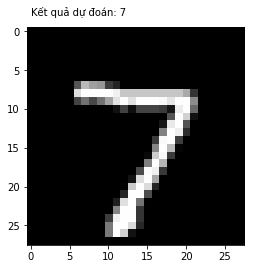

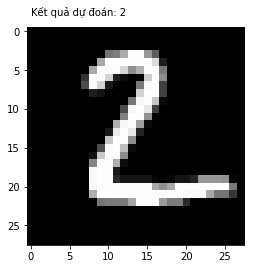

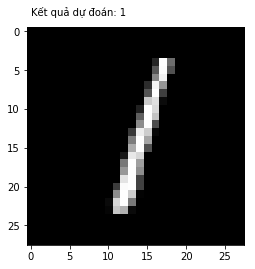

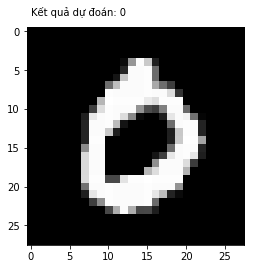

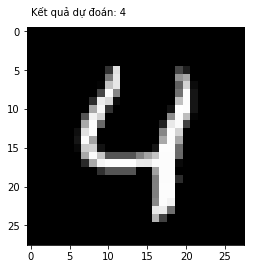

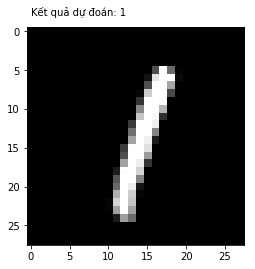

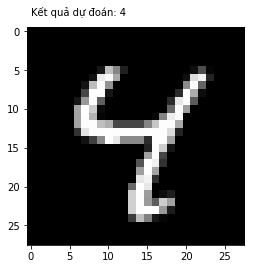

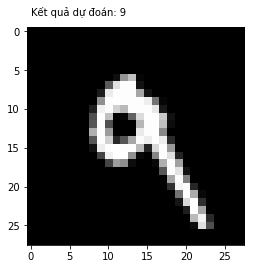

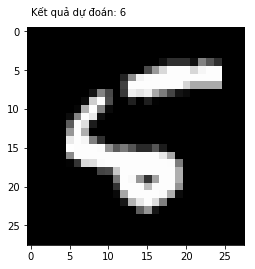

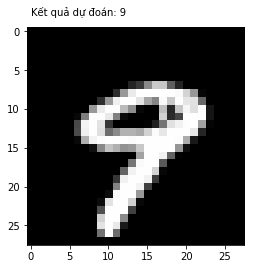

In [14]:
import matplotlib.pyplot as plt
import numpy as np
classes = model.predict(x_test, batch_size=128)
preds = np.argmax(classes, axis=1)

for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    predict = "Kết quả dự đoán: " + str(preds[i])
    plt.text(0, -2, predict)
    plt.show()